In [3]:
import numpy as np # math calculations and other matrix, vector calculations
import pandas as pd # dataframe organization
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [4]:
# load training data
df_train = pd.read_csv('data/housing_training.csv')
# load test data
df_test = pd.read_csv('data/house_test.csv')
# load test labels
df_labels = pd.read_csv('data/house_test_labels.csv')

In [5]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.37,33.87,19.0,757.0,148.0,361.0,141.0,6.0200,304200.0,<1H OCEAN
1,-120.86,35.39,23.0,1664.0,355.0,629.0,279.0,2.7344,188300.0,NEAR OCEAN
2,-117.18,33.16,15.0,5923.0,1206.0,3943.0,1006.0,3.1793,159900.0,<1H OCEAN
3,-118.30,34.06,23.0,2512.0,1203.0,3720.0,1118.0,1.7896,322200.0,<1H OCEAN
4,-121.45,38.56,52.0,3170.0,476.0,1027.0,457.0,4.6300,233800.0,INLAND


In [6]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,<1H OCEAN
1,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,INLAND
2,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,<1H OCEAN
3,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,<1H OCEAN
4,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,<1H OCEAN


In [7]:
df_labels.head()

,median_house_value
0,151600.0
1,99200.0
2,134500.0
3,231700.0
4,462900.0


In [8]:
df_train.shape

(13828, 10)

In [9]:
df_test.shape

(6812, 9)

In [10]:
df_labels.shape

(6812, 1)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 10 columns):
longitude             13828 non-null float64
latitude              13828 non-null float64
housing_median_age    13828 non-null float64
total_rooms           13828 non-null float64
total_bedrooms        13698 non-null float64
population            13828 non-null float64
households            13828 non-null float64
median_income         13828 non-null float64
median_house_value    13828 non-null float64
ocean_proximity       13828 non-null object
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [12]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        130
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
df_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        77
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [14]:
median_br_train = df_train['total_bedrooms'].median() # second option
df_train_fixed = df_train.copy() # copy dataframe
df_train_fixed['total_bedrooms'].fillna(median_br_train,
                                       inplace=True) # fill null values with median value of feature
df_train_fixed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
median_br_test = df_test['total_bedrooms'].median()
df_test_fixed = df_test.copy()
df_test_fixed['total_bedrooms'].fillna(median_br_test, inplace=True)
df_test_fixed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [16]:
reg = LinearRegression()

In [17]:
le = LabelEncoder()

In [18]:
le.fit(df_train_fixed['ocean_proximity'])

LabelEncoder()

In [19]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [20]:
#df_train_fixed['ocean_proximity'] = le.transform(df_train['ocean_proximity'].values)  # encode categorical data
#df_test_fixed['ocean_proximity'] = le.transform(df_test['ocean_proximity'].values)

In [21]:
df_train_fixed['ocean_proximity_coded'] = df_train['ocean_proximity'].map({'<1H OCEAN':2, 'INLAND':1, 'ISLAND':5,
                                                                              'NEAR BAY':3, 'NEAR OCEAN':4})
df_test_fixed['ocean_proximity_coded'] = df_test['ocean_proximity'].map({'<1H OCEAN':2, 'INLAND':1, 'ISLAND':5,
                                                                              'NEAR BAY':3, 'NEAR OCEAN':4})

In [22]:
df_train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 11 columns):
longitude                13828 non-null float64
latitude                 13828 non-null float64
housing_median_age       13828 non-null float64
total_rooms              13828 non-null float64
total_bedrooms           13828 non-null float64
population               13828 non-null float64
households               13828 non-null float64
median_income            13828 non-null float64
median_house_value       13828 non-null float64
ocean_proximity          13828 non-null object
ocean_proximity_coded    13828 non-null int64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.2+ MB


In [23]:
df_test_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 10 columns):
longitude                6812 non-null float64
latitude                 6812 non-null float64
housing_median_age       6812 non-null float64
total_rooms              6812 non-null float64
total_bedrooms           6812 non-null float64
population               6812 non-null float64
households               6812 non-null float64
median_income            6812 non-null float64
ocean_proximity          6812 non-null object
ocean_proximity_coded    6812 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 532.3+ KB


In [24]:
df_train_fixed = df_train_fixed.drop(['ocean_proximity'], axis=1)

In [25]:
df_test_fixed = df_test_fixed.drop(['ocean_proximity'], axis=1)

In [26]:
df_train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 10 columns):
longitude                13828 non-null float64
latitude                 13828 non-null float64
housing_median_age       13828 non-null float64
total_rooms              13828 non-null float64
total_bedrooms           13828 non-null float64
population               13828 non-null float64
households               13828 non-null float64
median_income            13828 non-null float64
median_house_value       13828 non-null float64
ocean_proximity_coded    13828 non-null int64
dtypes: float64(9), int64(1)
memory usage: 1.1 MB


In [27]:
df_test_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 9 columns):
longitude                6812 non-null float64
latitude                 6812 non-null float64
housing_median_age       6812 non-null float64
total_rooms              6812 non-null float64
total_bedrooms           6812 non-null float64
population               6812 non-null float64
households               6812 non-null float64
median_income            6812 non-null float64
ocean_proximity_coded    6812 non-null int64
dtypes: float64(8), int64(1)
memory usage: 479.1 KB


In [28]:
df_train_fixed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_coded
0,-118.37,33.87,19.0,757.0,148.0,361.0,141.0,6.0200,304200.0,2
1,-120.86,35.39,23.0,1664.0,355.0,629.0,279.0,2.7344,188300.0,4
2,-117.18,33.16,15.0,5923.0,1206.0,3943.0,1006.0,3.1793,159900.0,2
3,-118.30,34.06,23.0,2512.0,1203.0,3720.0,1118.0,1.7896,322200.0,2
4,-121.45,38.56,52.0,3170.0,476.0,1027.0,457.0,4.6300,233800.0,1


In [29]:
df_test_fixed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_coded
0,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,2
1,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,1
2,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,2
3,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,2
4,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a171fc250>,
      dtype=object)

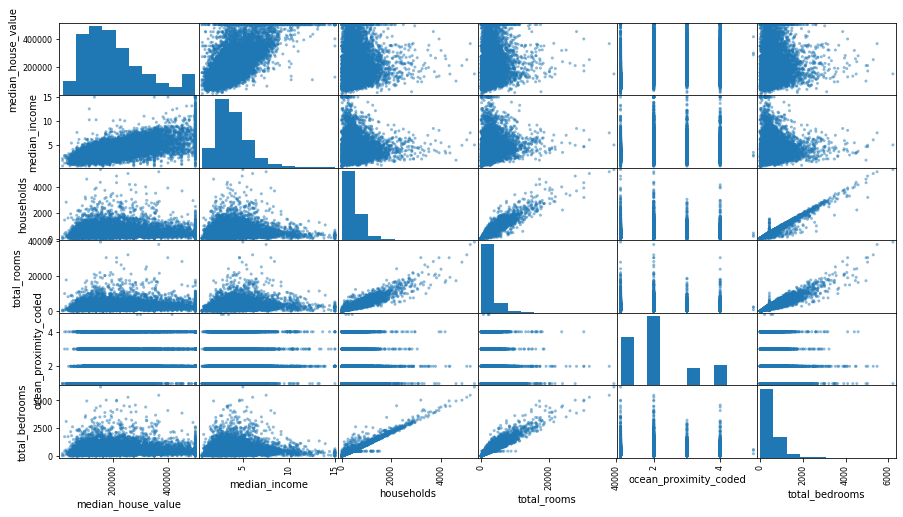

In [30]:
# scatter plot
from pandas.plotting import scatter_matrix
features = ['median_house_value', 'median_income', 'households', 'total_rooms',
            'ocean_proximity_coded','total_bedrooms']
scatter_matrix(df_train_fixed[features], figsize=(15,8))

In [31]:
df_train_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 10 columns):
longitude                13828 non-null float64
latitude                 13828 non-null float64
housing_median_age       13828 non-null float64
total_rooms              13828 non-null float64
total_bedrooms           13828 non-null float64
population               13828 non-null float64
households               13828 non-null float64
median_income            13828 non-null float64
median_house_value       13828 non-null float64
ocean_proximity_coded    13828 non-null int64
dtypes: float64(9), int64(1)
memory usage: 1.1 MB


In [32]:
df_test_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 9 columns):
longitude                6812 non-null float64
latitude                 6812 non-null float64
housing_median_age       6812 non-null float64
total_rooms              6812 non-null float64
total_bedrooms           6812 non-null float64
population               6812 non-null float64
households               6812 non-null float64
median_income            6812 non-null float64
ocean_proximity_coded    6812 non-null int64
dtypes: float64(8), int64(1)
memory usage: 479.1 KB


In [33]:
y_train = df_train_fixed['median_house_value']
X_train = df_train_fixed.drop(['longitude','latitude','housing_median_age','total_bedrooms','population',
                               'households','median_house_value','ocean_proximity_coded'],axis=1) 
X_test = df_test_fixed.drop(['longitude','latitude','housing_median_age','total_bedrooms','population',
                               'households','ocean_proximity_coded'],axis=1) 
y_real = df_labels

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 2 columns):
total_rooms      13828 non-null float64
median_income    13828 non-null float64
dtypes: float64(2)
memory usage: 216.2 KB


In [35]:
X_test.head()

,total_rooms,median_income
0,1974.0,3.7917
1,3297.0,4.0217
2,3570.0,4.0882
3,3201.0,2.2377
4,2704.0,4.4211


In [36]:
y_train.head()

0    304200.0
1    188300.0
2    159900.0
3    322200.0
4    233800.0
Name: median_house_value, dtype: float64

In [37]:
y_real.head()

,median_house_value
0,151600.0
1,99200.0
2,134500.0
3,231700.0
4,462900.0


In [38]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
reg.coef_

array([-1.09923059e-01,  4.19085079e+04])

In [40]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([204193.09372313, 213686.62232517, 216443.52910315, 138932.39690414,
       230490.06474137, 251187.01333677, 128664.70173399, 231020.44814704,
       176786.74371843, 126604.17595565])

In [41]:
y_real[:10]

,median_house_value
0,151600.0
1,99200.0
2,134500.0
3,231700.0
4,462900.0
5,140700.0
6,170300.0
7,160300.0
8,101800.0
9,168800.0


In [42]:
error = mean_squared_error(y_real[:len(y_pred)], y_pred)

In [43]:
print("mean squared error:", error)

mean squared error: 7001186561.655614


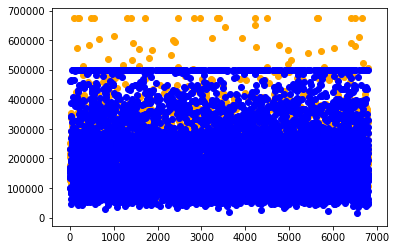

In [44]:
plt.scatter(range(len(y_pred)), y_pred, color="orange")
plt.scatter(range(len(y_pred)), y_real[:len(y_pred)].values, color="blue")
plt.show()